In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('supermarket_sales.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# Dataset Description
The dataset 'supermarket_sales' consists of 17 features and 1000 rows. This dataset records sales transactions in a store, including details like product, price, and customer information. It helps track sales performance, customer behavior, and profit margins. It captures sales of various product categories in branches located in specific cities at particular times and dates.   Key columns include 'Product line', 'Total', and 'Rating'. The 'Customer type' feature indicates whether a customer is a member of the supermarket or a regular shopper, while the 'Payment' feature describes the payment method used, including Credit card, Cash, or Ewallet.

# Preprocessing


In [5]:
# Invoice ID is not so important so we can remove that column
df = df.drop('Invoice ID', axis=1)

In [6]:
# Changing the date format
if df['Date'].dtype == 'O':
    df['Date'] = df['Date'].map(pd.to_datetime)
# Conveting the time to hours only
if df['Time'].dtype == 'O':
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

In [7]:
# Branch are Object types with values A, B and C hence replacing them with 1,2,3.
df['Branch'] = df['Branch'].replace({'A': 1, 'B':2, 'C':3})

In [8]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,1,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1
1,3,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6
2,1,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13,Credit card,324.31,4.761905,16.2155,7.4
3,1,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20,Ewallet,465.76,4.761905,23.2880,8.4
4,1,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13,Ewallet,40.35,4.761905,2.0175,6.2
996,2,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17,Ewallet,973.80,4.761905,48.6900,4.4
997,1,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13,Cash,31.84,4.761905,1.5920,7.7
998,1,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15,Cash,65.82,4.761905,3.2910,4.1


In [9]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   int64         
 1   City                     1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   int32         
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

In [10]:
df.describe()

,Branch,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,1.988000,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,14.910000,307.58738,4.761905,15.379369,6.97270
min,1.000000,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.000000,10.17000,4.761905,0.508500,4.00000
25%,1.000000,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,12.000000,118.49750,4.761905,5.924875,5.50000
50%,2.000000,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,15.000000,241.76000,4.761905,12.088000,7.00000
75%,3.000000,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,18.000000,448.90500,4.761905,22.445250,8.50000
max,3.000000,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,20.000000,993.00000,4.761905,49.650000,10.00000
std,0.817633,26.494628,2.923431,11.708825,245.885335,NaN,3.186857,234.17651,0.000000,11.708825,1.71858


In [11]:
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

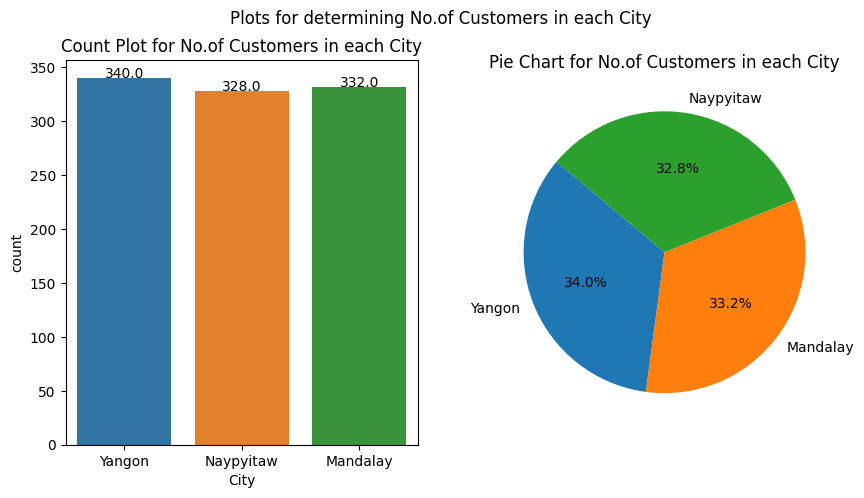

In [10]:
# No. of costumers in each city
def Count_Feature(data = None, feature = None):
    fig, axes = plt.subplots(1, 2 , figsize=(10,5))
    fig.suptitle("Plots for determining No.of Customers in each City")
    ax = sns.countplot(ax=axes[0],x=feature,data = data)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    axes[0].set_title("Count Plot for No.of Customers in each City")
   
    ax = axes[1]
    category_counts = data[feature].value_counts()
    ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

    axes[1].set_title("Pie Chart for No.of Customers in each City")
    plt.show()
Count_Feature(df,'City')

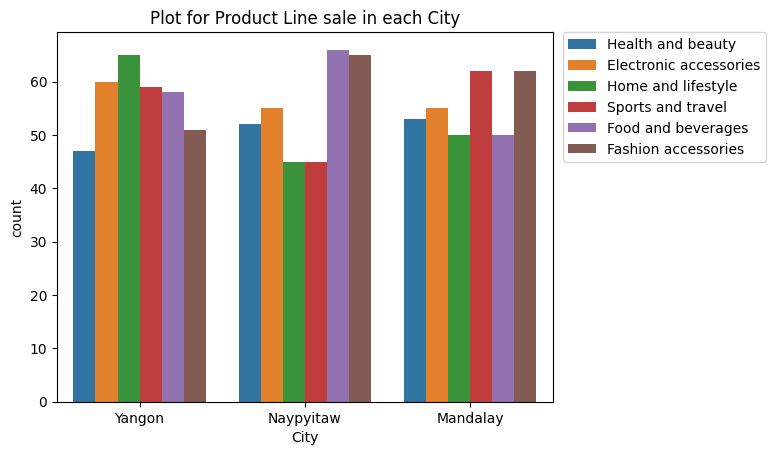

In [13]:
# City wise products sale
sns.countplot(data=df, x='City', hue='Product line')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Plot for Product Line sale in each City")
plt.show()

<Axes: xlabel='count', ylabel='Product line'>

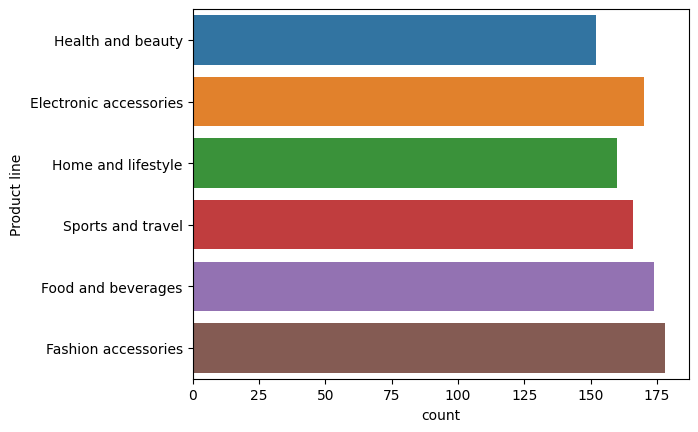

In [14]:
sns.countplot(data=df, y='Product line')
# plt.xticks(rotation=90)

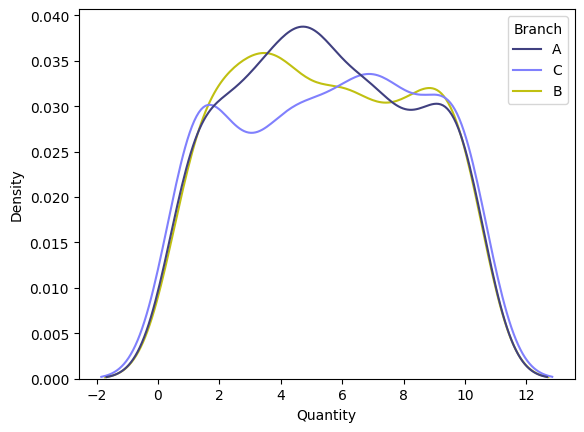

In [19]:
# Checking how much products each branch
# sell per purchase
sns.kdeplot(data=df, x='Quantity', hue='Branch', palette='gist_stern')
plt.show()


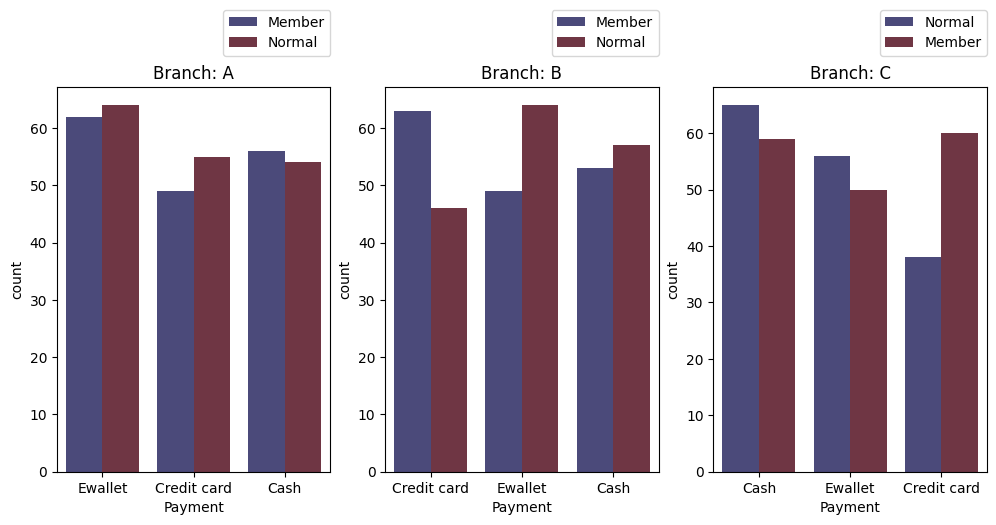

In [18]:
# Checking payment method for each
# branch and its costumers
fig, ax = plt.subplots(ncols=3, figsize=(12,5))
for index, branch in enumerate(['A', 'B', 'C']):
    ax[index].set_title(label=f'Branch: {branch}')
    sns.countplot(data=df[df['Branch'] == branch], x='Payment', hue='Customer type', palette='icefire', ax=ax[index])
    ax[index].legend(bbox_to_anchor=(1, 1.2), loc='upper right', borderaxespad=0)
plt.show()


C:\Users\Msc 1\AppData\Local\Temp\ipykernel_10868\2140079157.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=45)
C:\Users\Msc 1\AppData\Local\Temp\ipykernel_10868\2140079157.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels=ax[1].get_xticklabels(), rotation=45)


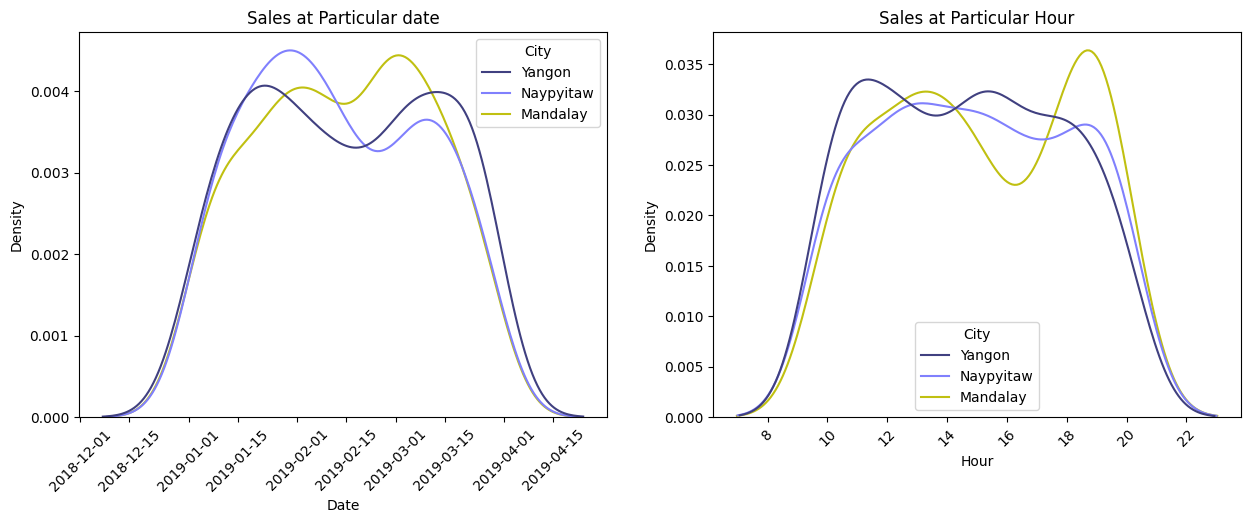

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.kdeplot(data=df, x='Date', hue='City', palette='gist_stern', ax=ax[0])
ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=45)
ax[0].set_title("Sales at Particular date")
sns.kdeplot(data=df, x='Time', hue='City', palette='gist_stern', ax=ax[1])
ax[1].set_xticklabels(labels=ax[1].get_xticklabels(), rotation=45)
ax[1].set_xlabel(xlabel='Hour')
plt.title("Sales at Particular Hour")
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

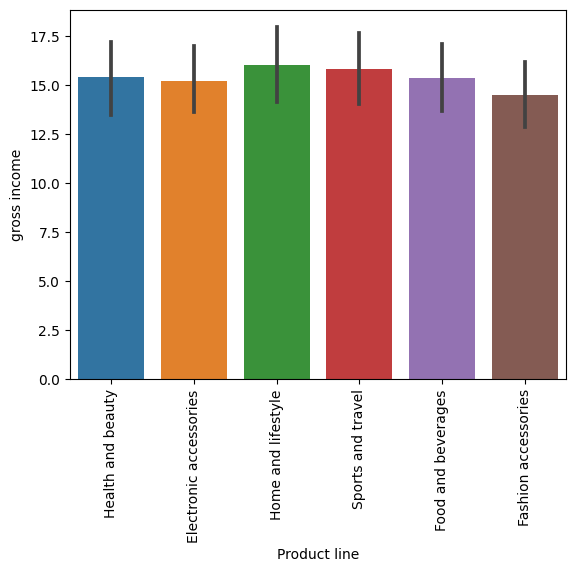

In [13]:
sns.barplot(data=df,x='Product line',y='gross income')
plt.xticks(rotation=90)

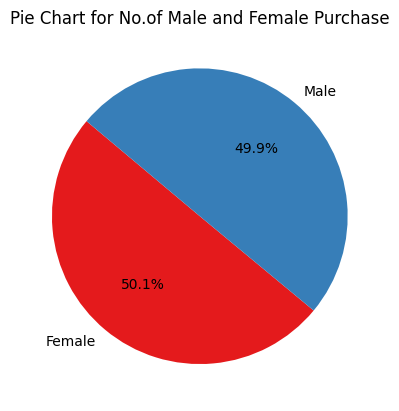

In [45]:
category_counts = df['Gender'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('Set1'))

plt.title("Pie Chart for No.of Male and Female Purchase")
plt.show()


# Correlation

In [33]:
# Chrecking correlation between price of product, tax and it rating
corr = df[['Unit price', 'Tax 5%', 'Rating']].corr()

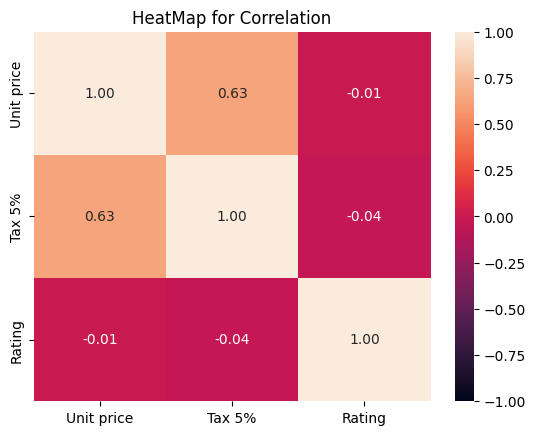

In [39]:
sns.heatmap(data=corr, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title("HeatMap for Correlation")
plt.show()


# Skewness Analysis

In [12]:
def Check_skew(df,feature):
    fig,axes = plt.subplots(1,3,figsize=(15,4))
    sns.boxplot(ax=axes[0],data=df,y=feature)   # For Plotting Boxplot on 1st plot axes
    axes[0].set_title(f"{feature} BoxPlot")     # BoxPlot title
    
    sns.histplot(ax=axes[1],data=df,x=feature,kde=True,color='red')     # For Plotting Histplot on 2nd plot axes
    axes[1].set_title(f"{feature} HistPlot")                            # HistPlot title
    
    scipy.stats.probplot(df[feature], sparams=(), dist='norm', fit=True, plot=axes[2], rvalue=False)    # For Plotting ProbabilityPlot on 3rd plot axes
    axes[2].set_title(f"{feature} Probabiltity Plot")                                                   # ProbabilityPlot title
    
    axes[1].annotate(round(df[feature].skew(),3), xy=(max(df[feature])*.95, 27), xytext=(max(df[feature])*.99, 27),    # For displaying the Skewness Value
                     fontsize=12, color='green', ha='right', va='top')
    plt.show()

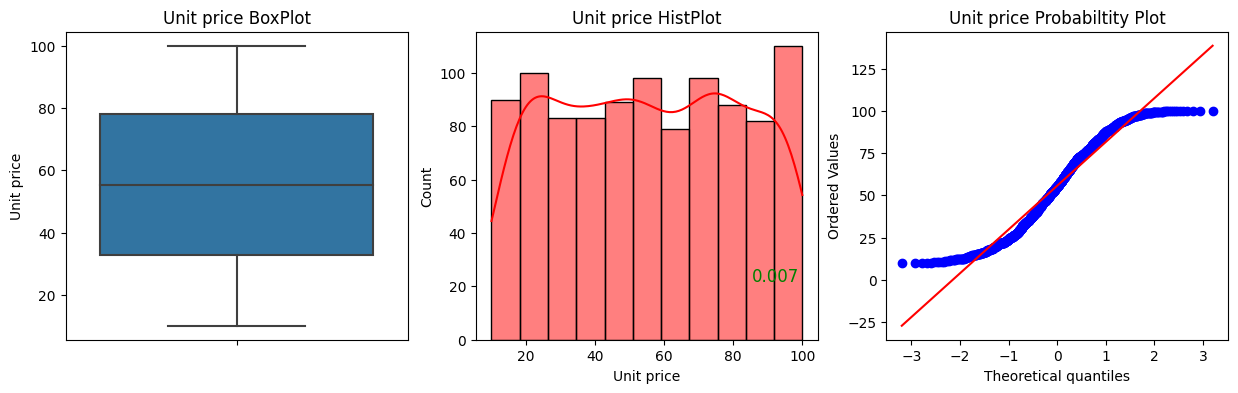

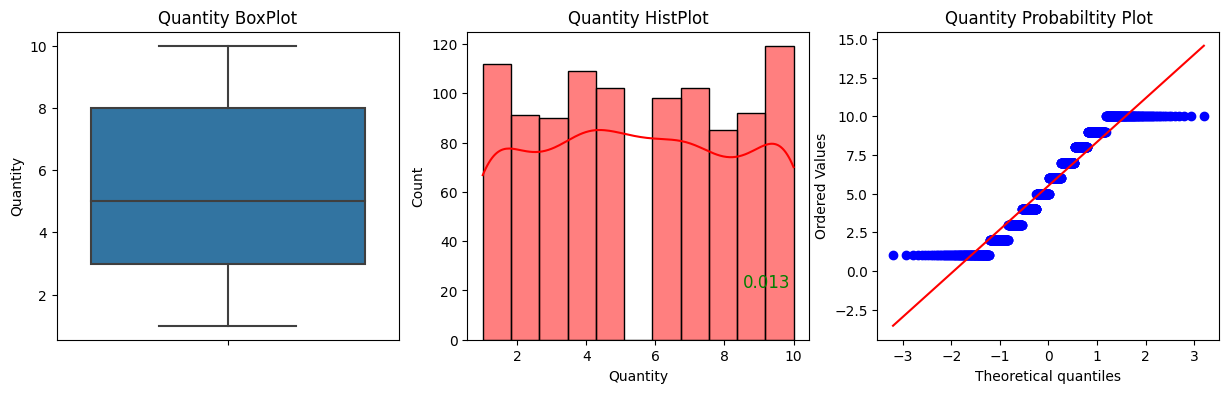

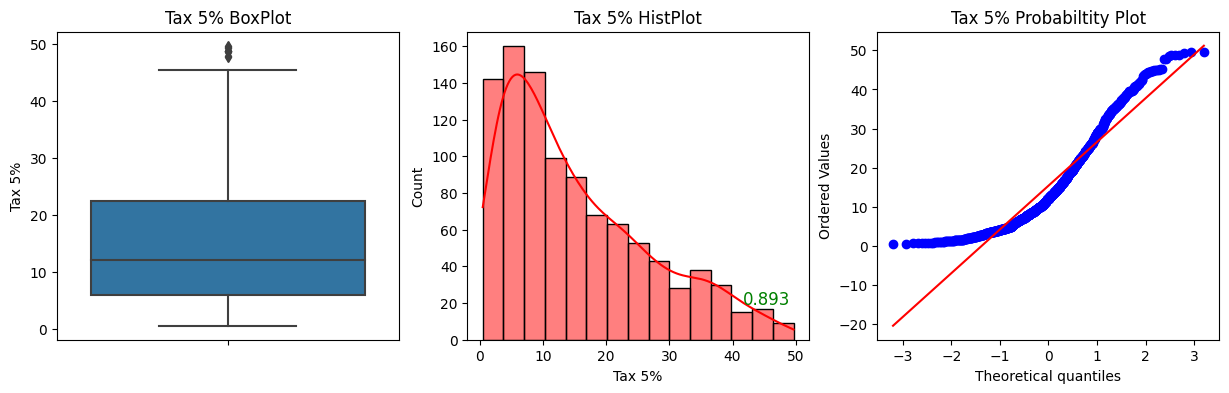

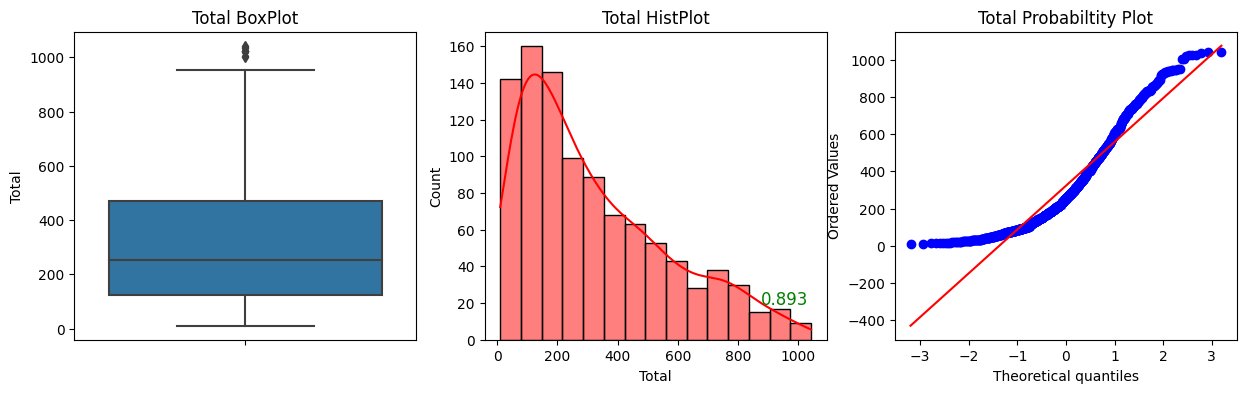

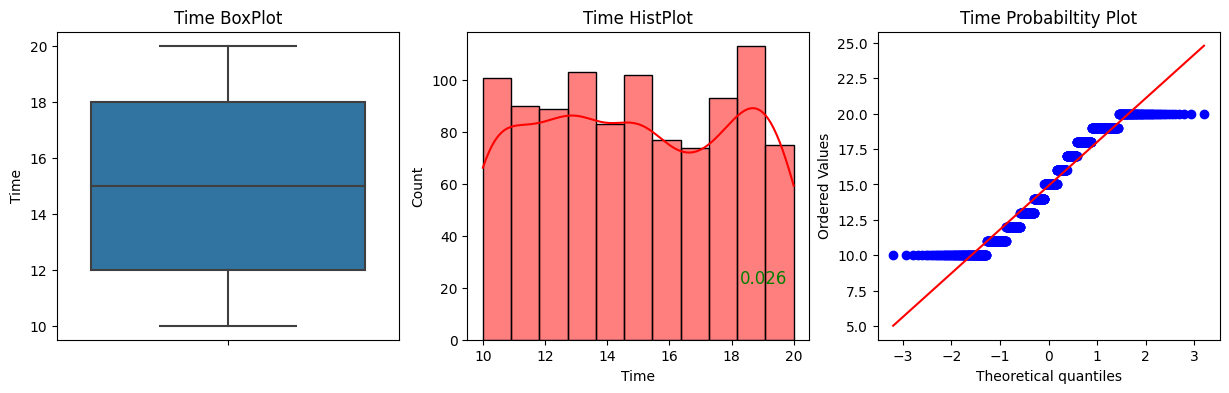

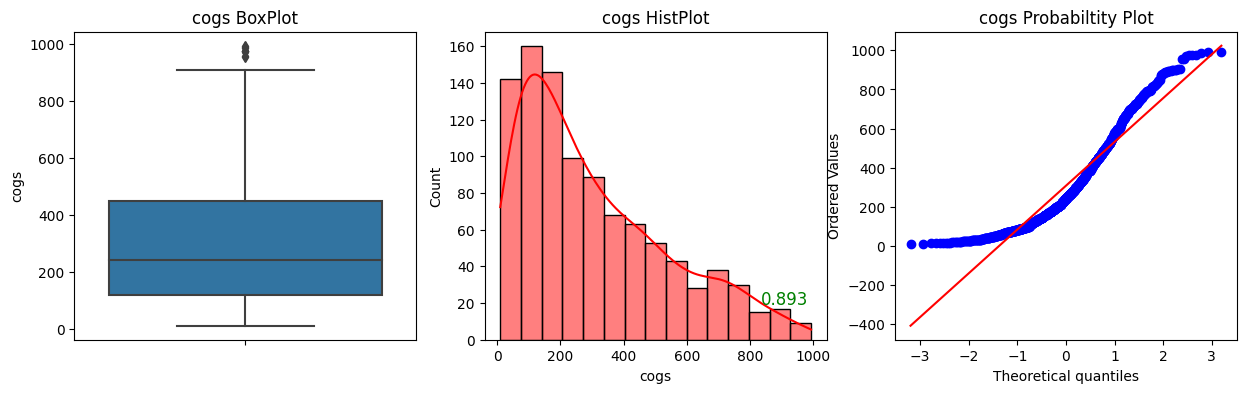

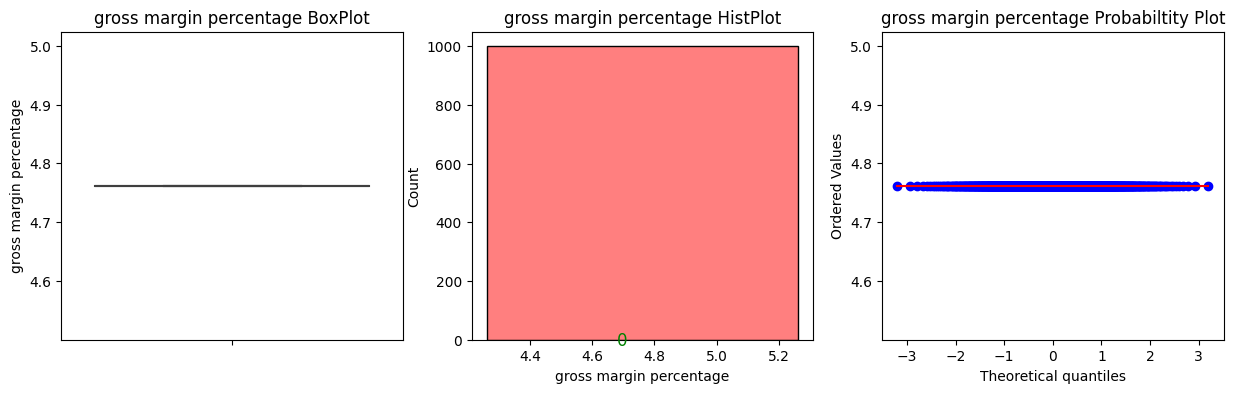

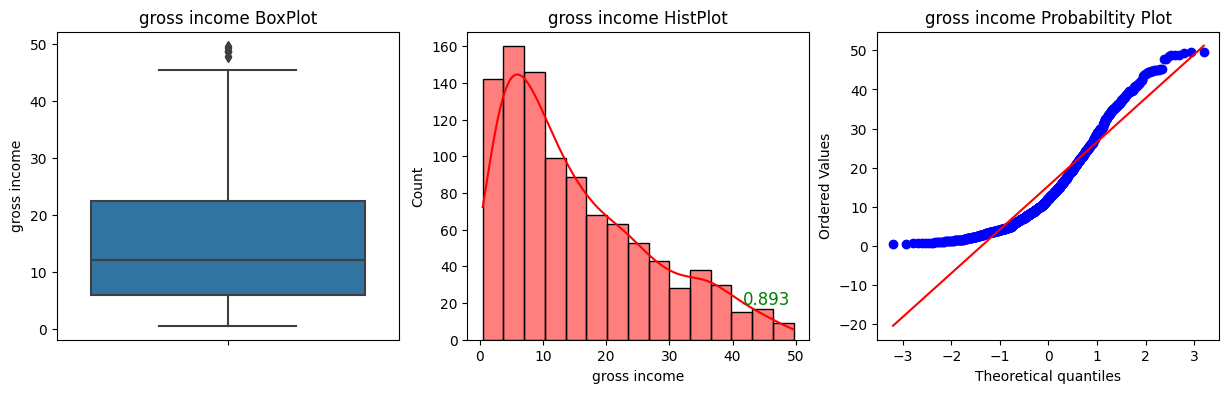

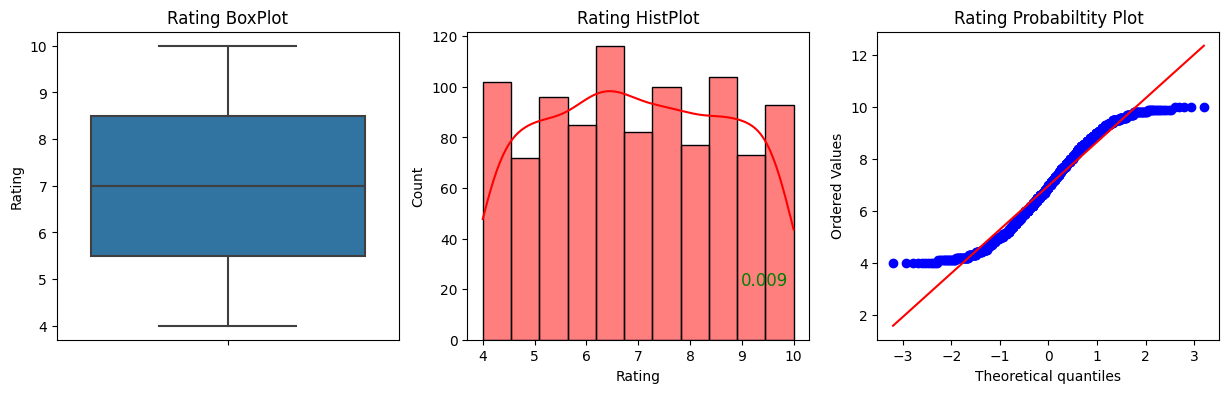

In [13]:
import scipy
from scipy import stats
obj_col = df.select_dtypes(include=['object','datetime64[ns]']).columns
for cols in df:
    if(cols != 'Branch' and cols not in obj_col):
        Check_skew(df,cols)

# Inference before Transformation :

1) Unit Price : Observing Boxplot we cannot say that it is Skewed and from histplot is not sure wheather Unit Price is Skewed.  
            But, from Probability Plot we can say that Unit Price is skew.

2) Quantity : Observing Boxplot we cannot say that it is Skewed and from histplot is not sure wheather Quantity is Skewed.  
            But, from Probability Plot we can say that Quantity is skew.

3) Tax 5% : Observing BoxPlot and HistPlot we say that Tax 5% is Right Skewed and from Probability Plot we can say that
                Tax 5% is skew and also having some outliers.
                
4) Total : Observing BoxPlot and HistPlot we say that Total is Right Skewed and from Probability Plot we can say that
                Total is skew and also having some outliers.

5) Time : Observing Boxplot we cannot say that it is Skewed and from histplot is not sure wheather Time is Skewed.  
            But, from Probability Plot we can say that Time is skew.

6) cogs : Observing BoxPlot and HistPlot we say that cogs is Right Skewed and from Probability Plot we can say that
                cogs is skew and also having some outliers.

7) Gross margin Percentage : Is a straight line, which means in every city the margin % is same.

8) Gross income : Observing BoxPlot and HistPlot we say that Gross income is Right Skewed and from Probability Plot we can say
                that Gross income is skew and also having some outliers.

9) Rating : Observing Boxplot we cannot say that it is Skewed and from histplot is not sure wheather Rating is Skewed. 
            But, from Probability Plot we can say that Rating is skew.


# Conclusion : 
    The above features are Skewed. So we apply the transformation by boxcox function to transform the DataFrame(df).

# Transformation

In [14]:
# Transformation
transformed_data = {}   # To store the transform data in dictionary

def transformation(df,feature):    # Function to apply Boxcox.
    trans, lam = stats.boxcox(df[feature])
    return(trans)

for cols in df:          # Iterating from every col and transforming the data.
    if(cols == 'Branch' or cols == 'gross margin percentage' or cols in obj_col):
        transformed_data[cols] = df[cols]
    else:
        transformed_data[cols] = transformation(df,cols)
        
ndf = pd.DataFrame(transformed_data)      # New dataframe for Transformed data


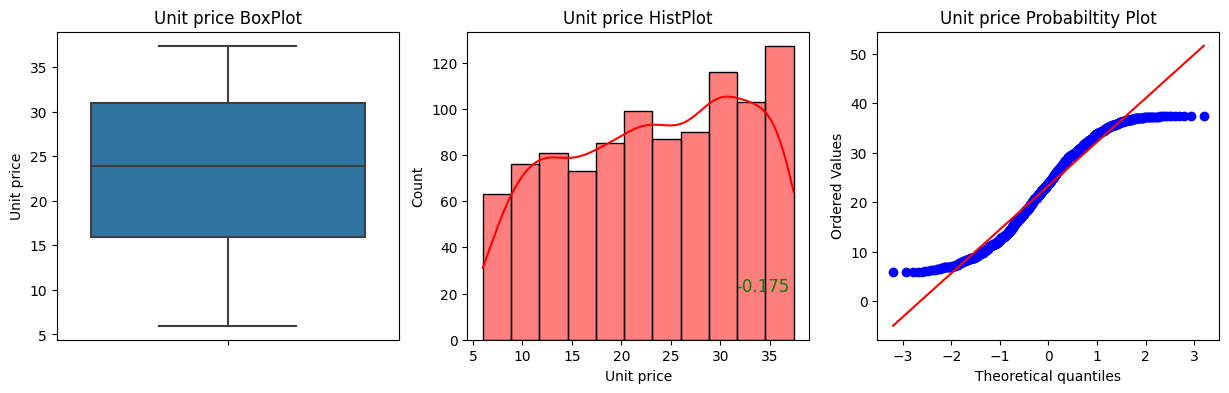

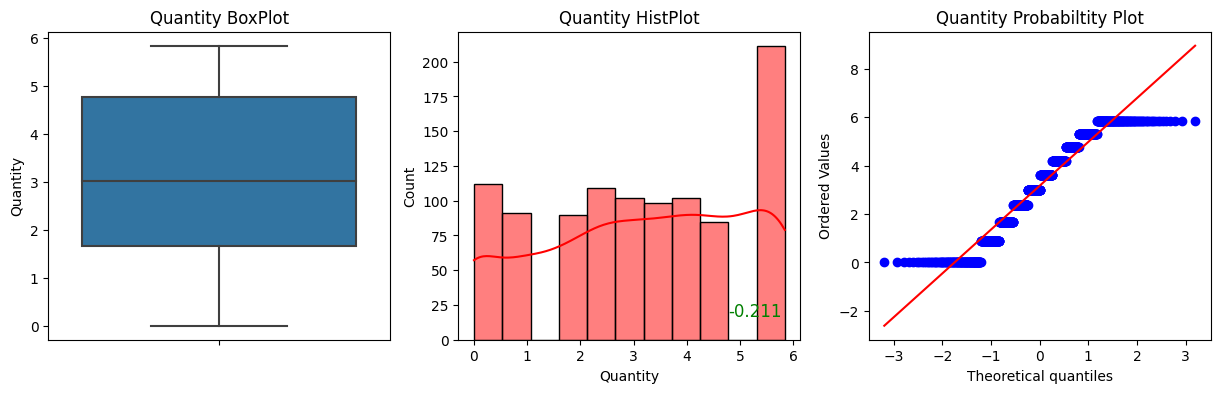

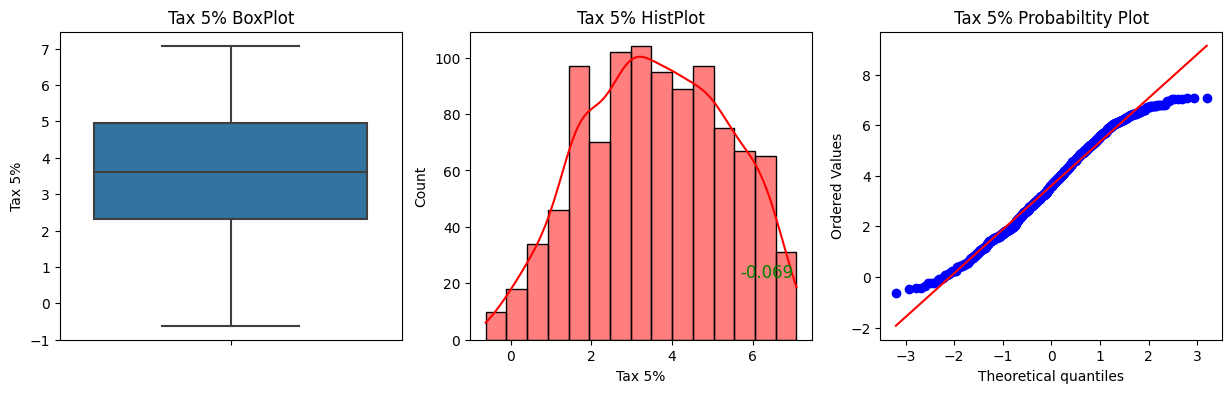

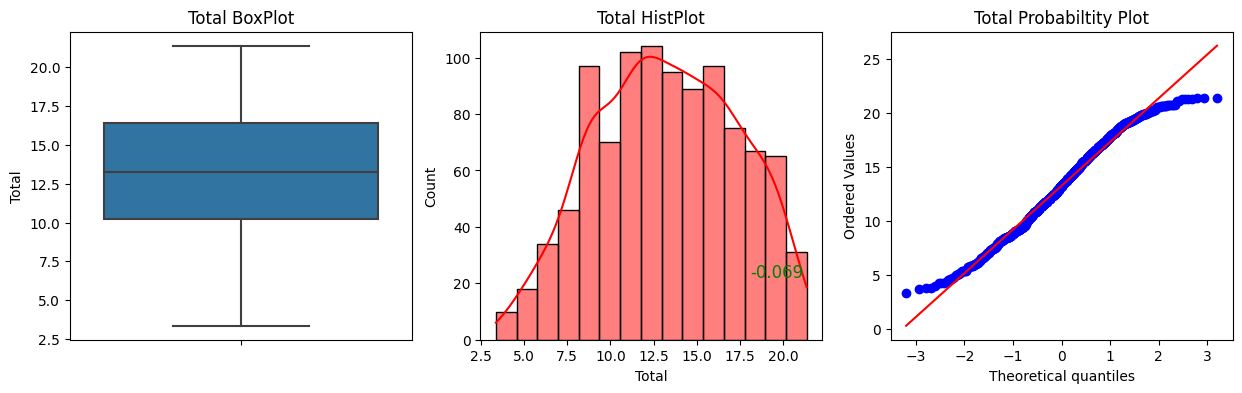

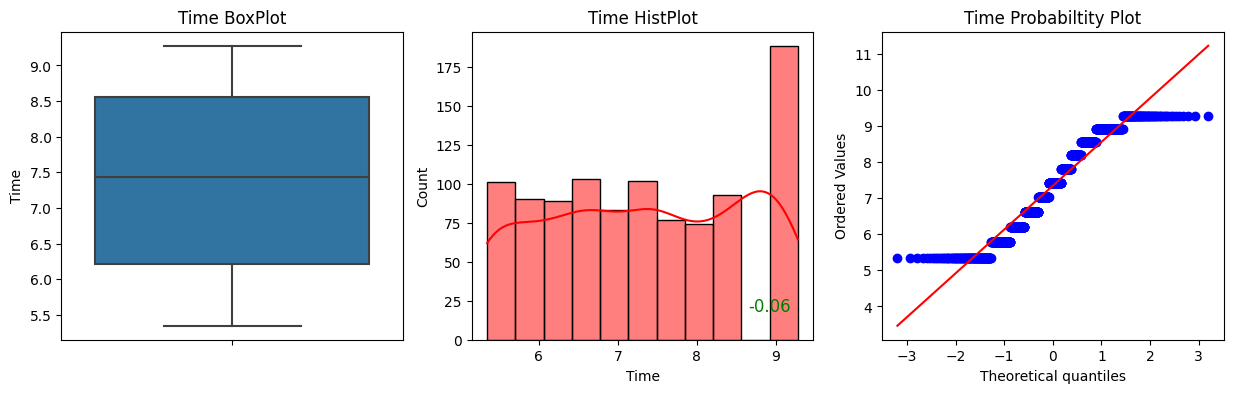

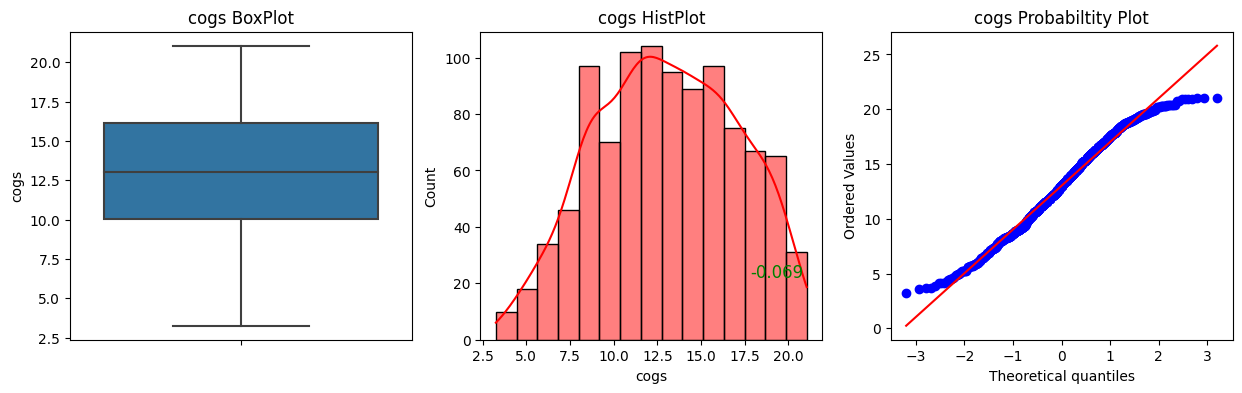

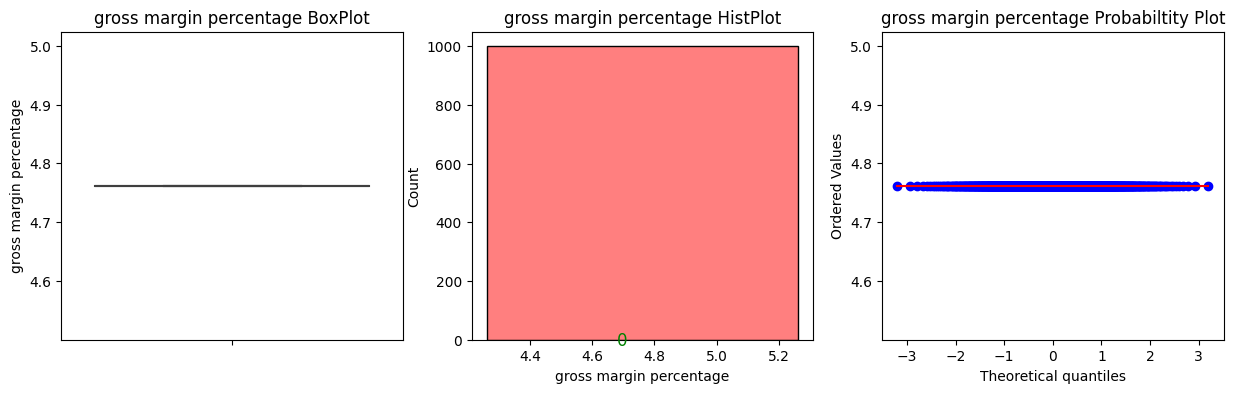

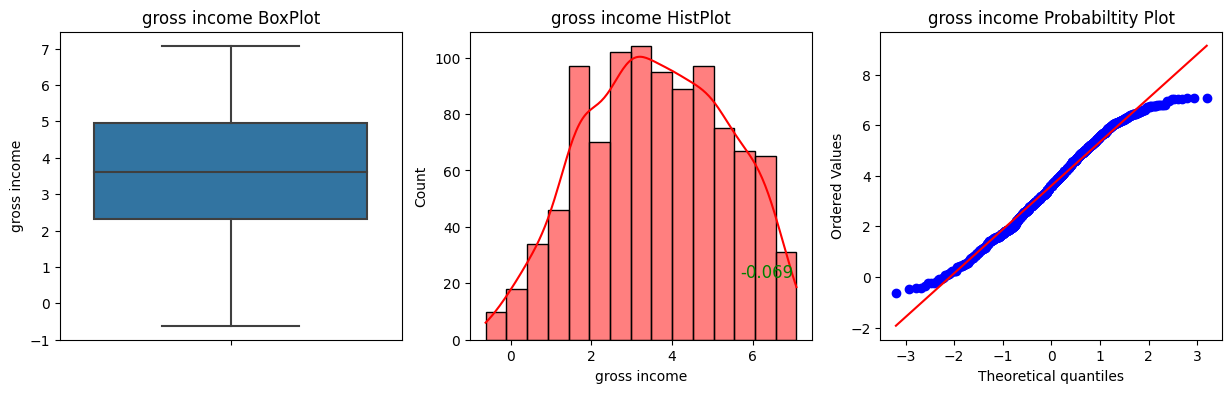

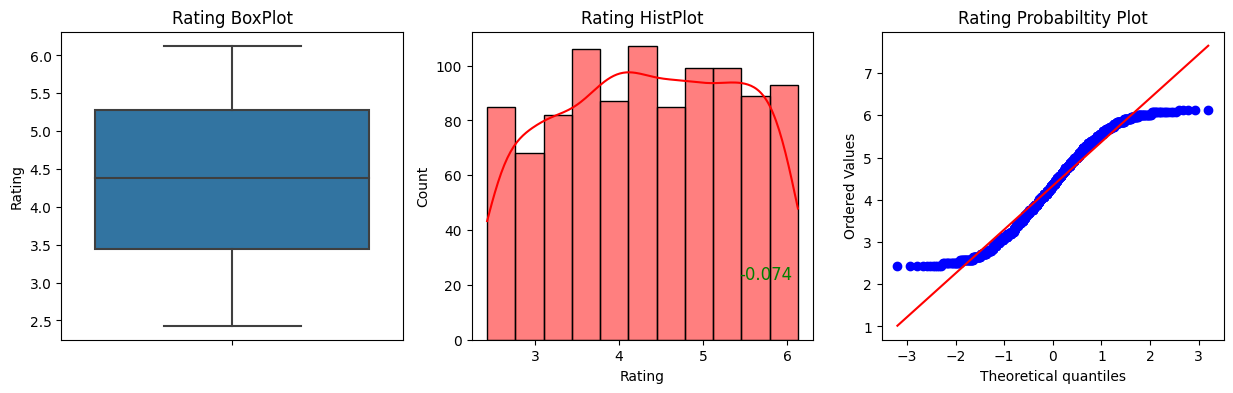

In [15]:
for cols in ndf:
    if(cols != 'Branch' and cols not in obj_col):
        Check_skew(ndf,cols)

# TESTING HYPOTHESIS

Testing Hypothesis for mean of the Total purchages column:
# $$H0: μ = 320 vs H1: μ \neq 320 $$
$$ \alpha = 0.05 $$
$$ \sigma^2 is not known $$

In [16]:
# Declaring Ho
Ho = 320
# lets find the sample variance
s2 = df['Total'].var(ddof=1)    # s^2 value
s = np.sqrt(s2)                 # s value
print("The value of s =",s)

The value of s = 245.88533510097187


In [17]:
def hyp_testing(data=None,alpha=0.05,Ho=None,var=None,s = None): # Function for testing for μ for both sigma known and unknown
    mean = float(data.mean())                                    # Getting the sample mean of the data
    n = len(data)
    if(var != None):                                             # If variance is knowm
        z_cal = abs((mean - Ho)/(np.sqrt(var)/np.sqrt(n)))         # Calculating z_cal value
        p = stats.norm.cdf(z_cal)                                  # p value
    elif(n > 30):                                                # If the variance is unknowm and n > 30
        z_cal = abs((mean - Ho)/(np.sqrt(s)/np.sqrt(n)))           # Calculating z_cal value
        p = stats.norm.cdf(z_cal)                                  # p value
    else:                                                        # If the variance is unknowm and n <= 30
        t_cal = abs((mean - Ho)/(s/np.sqrt(n)))                    # Calculating t_cal value
        p = 2*(1-stats.t.cdf(t_cal,df=n))                          # p value
    if(p <= alpha):                                              # if p <= alpha reject Ho
        print("reject Ho")
    else:
        print("do not reject Ho")

In [18]:
hyp_testing(data=df['Total'],Ho=Ho,s = s)           # Calling the Function: hyp_testing() 

do not reject Ho


Testing Hypothesis for mean of the Gross income column:
# $$H0: μ = 20 vs H1: μ \neq 20 $$
$$ \alpha = 0.05 $$
$$ \sigma^2 is not known $$

In [31]:
# Declaring Ho
Ho = 20
# lets find the sample variance
s2 = df['gross income'].var(ddof=1)    # s^2 value
s = np.sqrt(s2)                 # s value
print("The value of s =",s)

The value of s = 11.708825480998659


In [21]:
hyp_testing(data=df['gross income'],Ho=Ho,s = s)           # Calling the Function: hyp_testing() 

do not reject Ho


# Confidence Interval

In [21]:
num_cols = ndf.select_dtypes(include=['int', 'float']) # Getting Integer and Float features
num_cols = num_cols.drop(columns=['Branch'])       # From that removing 'Branch' feature
# Calculate the mean for the selected columns
mean = num_cols.mean()

In [22]:
s = np.sqrt(num_cols.var(ddof=1))     # population Standard Deviation
s

Unit price                 9.027090
Quantity                   1.869400
Tax 5%                     1.738318
Total                      4.071221
Time                       1.251309
cogs                       4.016074
gross margin percentage    0.000000
gross income               1.738318
Rating                     1.056039
dtype: float64

In [29]:
def Mean_Interval(data = None,obj_col = None,mean=None,s=None):   # Function for finding Mean_Inteval
    Intervals = []                                                # List of storing the Lower and upper bound
    temp = []                                                     # Temp list
    i = 0
    for cols in data:
        if(cols not in obj_col and cols != 'Branch'):
            n = len(data[cols])
            t_value = stats.t.ppf(0.975, df=(n-1))          # Finding the t_value
            lower = mean[i] - t_value*(s[i]/np.sqrt(n))     # Calculating the lower Bound
            upper = mean[i] + t_value*(s[i]/np.sqrt(n))     # Calculating the upper Bound
            temp.append(lower)
            temp.append(upper)
            Intervals.append(temp)             # appending it to the list
            i += 1
            temp = []
    return Intervals                                    
        
interval = Mean_Interval(ndf,obj_col,mean,s)         # Calling the function Mean_Interval()
features = ['Unit price','Quantity','Tax 5%','Total','Time','cogs','gross margin percentage','gross income','Rating' ]   # List
limits_mean = pd.DataFrame(interval, columns = ['Lower_Limit','Upper_Limit'] )   # Pandas dataframe for Mean interval
limits_mean.insert(0,"Features",features)
limits_mean

,Features,Lower_Limit,Upper_Limit
0,Unit price,22.798422,23.918769
1,Quantity,3.055236,3.287246
2,Tax 5%,3.498254,3.713995
3,Total,12.994208,13.499485
4,Time,7.269072,7.424371
5,cogs,12.769736,13.268168
6,gross margin percentage,4.761905,4.761905
7,gross income,3.498254,3.713995
8,Rating,4.267356,4.398420


In [30]:
s2 = num_cols.var(ddof=1)     # population variance


Unit price                 81.488357
Quantity                    3.494657
Tax 5%                      3.021750
Total                      16.574839
Time                        1.565773
cogs                       16.128850
gross margin percentage     0.000000
gross income                3.021750
Rating                      1.115218
dtype: float64

In [32]:
def Variance_Interval(data = None,obj_col = None,s2 = None):  # Function for finding Variance_Inteval
    Intervals = []                                            # List of storing the Lower and upper bound
    temp = []                                                 # Temp list
    i = 0
    for cols in data:
        if(cols not in obj_col and cols != 'Branch'):
            n = len(data[cols])
            chi_1 = stats.chi2.ppf(0.975, df=(n-1))           # chi_square value for alpha/2
            chi_2 = stats.chi2.ppf(1-0.975, df=(n-1))         # chi_square value for 1 - alpha/2
            lower = ((n-1)*s2[i]) / chi_1                    # Calculating the lower Bound
            upper = ((n-1)*s2[i]) / chi_2                    # Calculating the upper Bound
            temp.append(lower)                             
            temp.append(upper)
            Intervals.append(temp)
            i += 1
            temp = []
    return Intervals
 
s2 = num_cols.var(ddof=1)     # population variance
    
interval_var = Variance_Interval(ndf,obj_col,s2)       
limits_var = pd.DataFrame(interval_var, columns = ['Lower_Limit','Upper_Limit'] )   # Pandas dataframe for Variance interval
limits_var.insert(0, "Features", features)
limits_var

,Features,Lower_Limit,Upper_Limit
0,Unit price,74.789009,89.134764
1,Quantity,3.207353,3.822576
2,Tax 5%,2.773325,3.305294
3,Total,15.212182,18.130128
4,Time,1.437048,1.712697
5,cogs,14.802860,17.642290
6,gross margin percentage,0.000000,0.000000
7,gross income,2.773325,3.305294
8,Rating,1.023533,1.219864
